# Otsu Global

### Chat GPT Threshhold calculation

##### Imports & Bild laden

In [41]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

# Bild laden und in uint8 (0–255) konvertieren
image = io.imread("dna-44.png", as_gray=True)

print("Bildshape:", image.shape)

Bildshape: (1024, 1344)


##### Histogramm berechnen

Hist sum: 1376256
Amount for each pixel value: [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0   235  8025 23952 34250 40677 39380 39670
 36162 28245 28943 34913 31121 25302 23345 24143 22066 20142 22079 22771
 21665 21541 21637 22593 23949 26360 26861 25428 23530 21125 19671 19532
 20785 21070 20174 18911 19269 20756 21291 21403 19992 19481 18794 18210
 17024 15641 14367 13377 12679 12284 12301 11829 11429 10540 10175 10059
  9407  8746  8143  7363  6628  6100  5643  5377  4999  4845  4779  4614
  4287  4194  3786  3717  3485  3398  3274  2946  2955  3240  2726  2603
  2594  2507  2375  2473  2458  2361  2250  2284  2225  2175  2176  2160
  2110  2055  1958  2022  1891  1967  1880  1836  1776  1770  1653  1640
  1498  1517  1396  1295  1171  1172  1110  1002   968   889   842   813
   773   776   728   729   670   682   597   533   517   514   489   453
   427   372   404   357   353   344   341   301   276   242   214   255
   2

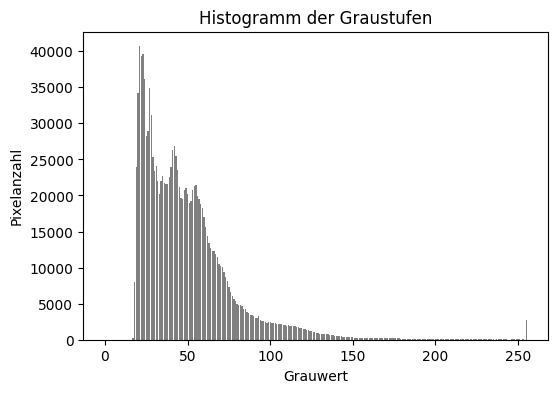

In [42]:
# Histogramm
hist = np.bincount(image.ravel(), minlength=256)
total = hist.sum()
print("Hist sum:", total)
print("Amount for each pixel value:", hist)

plt.figure(figsize=(6,4))
plt.bar(range(256), hist, color='gray')
plt.title("Histogramm der Graustufen")
plt.xlabel("Grauwert")
plt.ylabel("Pixelanzahl")
plt.show()

##### Otsu manuell berechnen

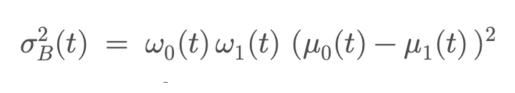

In [43]:
Otsu_Formel = io.imread("Otsu_Formel.png")
plt.imshow(Otsu_Formel)
plt.axis('off')
plt.show()

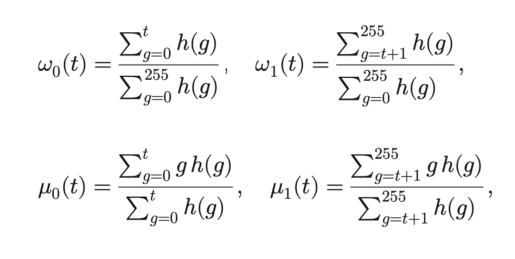

In [44]:
Otsu_Formel_Variablen = io.imread("Otsu_Formel_Variablen.png", as_gray=True)
plt.imshow(Otsu_Formel_Variablen, cmap= 'gray')
plt.axis('off')
plt.show()

In [ ]:
# Präcompute kumulierte Gewichte und Mittel
omega0 = np.cumsum(hist) / total
mu0_cum = np.cumsum(np.arange(256) * hist)

max_var = 0.0
best_t  = 0

for t in range(256):
    w0 = omega0[t]
    w1 = 1 - w0
    if w0 == 0 or w1 == 0s:
        continue
    mu0 = mu0_cum[t]           / (w0 * total)
    mu1 = (mu0_cum[-1] - mu0_cum[t]) / (w1 * total)
    varB = w0 * w1 * (mu0 - mu1)**2
    if varB > max_var:
        max_var = varB
        best_t  = t

print("Otsu‐Schwellenwert:", best_t)

Otsu‐Schwellenwert: 66


##### Ergebnisse Anzeigen

Maske [[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
O,1 Maske [[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


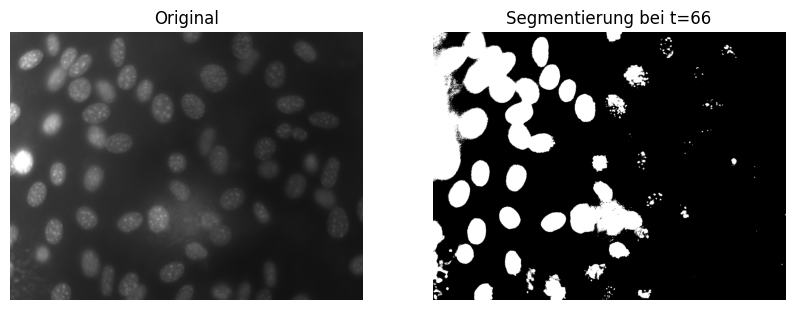

In [49]:
mask = image > best_t
print("Maske", mask)
otsu_gt = mask.astype(int)
print("O,1 Maske", otsu_gt)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,5))
ax0.imshow(image, cmap="gray", vmin=0, vmax=255)
ax0.set_title("Original")
ax0.axis("off")

ax1.imshow(mask, cmap="gray")
ax1.set_title(f"Segmentierung bei t={best_t}")
ax1.axis("off")

plt.show()